# AI... ML... Data Science... oOOooO Scary
<br>

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

<br>

# "Why is Bitcoin going up/down?"
## Trading volume? Google Searches? Tether issuance?

## Let's find out!

<br>
<br>
<br>

# 1) Import packages

## *pandas* : your data science go-to
* build datasets incredibly easily

## *sklearn* : for machine learning
* train and test statistical models



In [2]:
import pandas as pd
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

# Other stuff
import itertools
import numpy as np

<br>

# 2) Clean data

## Tweak the data for analysis

In [3]:
# Get .csv file as dataframe
data = pd.read_csv('btc_daily.csv')
print(data)

# Add next-day price column to simulate prediction
closes = list(data['close'])
closes.insert(0, np.nan)
closes.pop()
data['next_close'] = closes

# Only include full rows
data = data.iloc[1:1750]

# Expand Google Trends column from weekly to daily by repeating values x7
trends = list(data['google_trends'])
data['google_trends'] = list(itertools.chain.from_iterable(itertools.repeat(x, 7) for x in trends))[:1749]
    
# Replace NaN with previous value in column to normalize
sp = list(data['sp500'])

for index, price in enumerate(sp):
    if np.isnan(price):
        sp[index] = sp[index-1]

data['sp500'] = sp

# Show data
print(data)

           date  ticker      open      high       low     close   vol_btc  \
0     9/27/2019  BTCUSD   8060.00   8289.00   7861.02   8289.00  12634.65   
1     9/26/2019  BTCUSD   8438.35   8464.08   7712.45   8060.00  25063.02   
2     9/25/2019  BTCUSD   8530.01   8743.86   8222.01   8438.35  23161.99   
3     9/24/2019  BTCUSD   9693.74   9777.16   8159.35   8530.01  31693.09   
4     9/23/2019  BTCUSD  10026.80  10051.15   9609.37   9693.74  10409.03   
5     9/22/2019  BTCUSD   9973.99  10097.00   9848.37  10026.80   5113.54   
6     9/21/2019  BTCUSD  10168.85  10170.15   9917.34   9973.99   4829.81   
7     9/20/2019  BTCUSD  10275.01  10309.84  10056.30  10168.85   6147.42   
8     9/19/2019  BTCUSD  10155.26  10379.15   9585.86  10275.01  13548.83   
9     9/18/2019  BTCUSD  10185.39  10258.00  10074.08  10155.26   5564.14   
10    9/17/2019  BTCUSD  10262.54  10276.18  10135.44  10185.39   5710.49   
11    9/16/2019  BTCUSD  10304.46  10379.98  10068.42  10262.54   7384.74   

<br>

# 3) Build model

## Quantify the relationship between variables

* X / Input / Independent / Predictor variables
    * Trading volume
    * Tether issuance
    * Google Trends


* Y / Output / Dependent / Response variable
    * Bitcoin price

<br>    

## 3a) Create datasets for variables

* X predictor matrix and Y response vector
* Split datasets into *train* and *test* data

In [45]:
# Get input values from dataframe
x = data[['vol_btc', 'usdt_supply', 'google_trends', 'sp500']].copy().values
print(x)
print()

# Get output values from dataframe
y = list(data['next_close'])
print(y)
print()

# Separate train and test data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=.25)

print(x_train.shape)
print(len(y_train))
print()
print(x_test.shape)
print(len(y_test))


[[2.50630200e+04 3.02000000e+09 6.00000000e+00 2.97762012e+03]
 [2.31619900e+04 3.02000000e+09 6.00000000e+00 2.98487012e+03]
 [3.16930900e+04 3.02000000e+09 6.00000000e+00 2.96660010e+03]
 ...
 [5.46600000e-01 1.00000000e+02 2.00000000e+00 1.68155005e+03]
 [1.50100000e+01 1.00000000e+02 2.00000000e+00 1.68155005e+03]
 [5.65600000e-02 1.00000000e+02 2.00000000e+00 1.68155005e+03]]

[8289.0, 8060.0, 8438.35, 8530.01, 9693.74, 10026.8, 9973.99, 10168.85, 10275.01, 10155.26, 10185.39, 10262.54, 10304.46, 10360.25, 10365.93, 10423.72, 10160.2, 10093.01, 10310.0, 10398.97, 10484.37, 10308.92, 10574.73, 10581.84, 10628.48, 10381.26, 9766.52, 9600.86, 9582.42, 9495.0, 9714.31, 10171.85, 10361.65, 10138.72, 10147.96, 10410.85, 10107.15, 10130.0, 10769.09, 10920.0, 10315.48, 10217.79, 10352.78, 10300.01, 10025.86, 10854.92, 11389.28, 11540.76, 11280.95, 11856.1, 11981.0, 11975.03, 11465.49, 11819.49, 10977.51, 10820.76, 10533.01, 10405.94, 10087.3, 9589.01, 9495.01, 9533.0, 9479.98, 9843.0, 988


<br>

## 3b) Fit model

* Use train data to fit a statistical model
* Use test data to make predictions
* Show results

In [46]:
# Fit linear regression model
model_lin = linear_model.LinearRegression()
model_lin.fit(x_train, y_train)

# Make predictions based on test inputs
pred_lin = model_lin.predict(x_test)
print(pred_lin)
print()

# Score predictions with test outputs and print results
print('--LINEAR REGRESSION RESULTS--')
print(model_lin.coef_)
print(metrics.explained_variance_score(y_test, pred_lin))
print(metrics.r2_score(y_test, pred_lin))
print(metrics.mean_squared_error(y_test, pred_lin))

[ 6600.47768694   945.50983268  1197.91529601   483.59827533
   359.35776413  9836.97407947  8128.35269742   637.0334338
   562.07941663  1056.17713555   523.9454527    720.25847697
  2672.47507083   409.34820314  6956.68772212   355.06372737
  8602.52027725  7060.15039194   524.78347811  7202.5769071
  7228.76093796   604.76551997   406.02558583   798.57849987
  6592.79744533  7301.57218617   920.20704568  3216.48083651
  3027.20799353   770.1274441    631.68614697   489.94337446
  7467.46203272  6920.86048614  7293.68145866   904.39104475
   620.89376661   727.53337743   472.95974094  6831.61350463
  1223.45441885   876.25407504  3664.04752318   630.4313036
   619.05328205  7106.19034522   409.90230077   518.61898109
  7821.48799722  1187.97612269  6539.66703259  6610.95699918
   425.86513578   586.34946866  6857.2756023    387.10127661
  7157.66780585  6739.39736756  1283.89728466  6363.68061562
   291.80630655   291.33919811   970.11157819   388.38629493
  9881.33476999   391.67305


<br>

## 3c) Optimize

* Feature selection
    * Check the significance of your inputs
    * Consider under/overfitting
    
* Data transformation
    * Normalize your inputs
    * Try log() 


In [61]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression

# Linear model summary, check t-values (significance) of inputs
lm = sm.OLS(y, x)
lm = lm.fit()
print(lm.summary())
print()

# Correlation matrix
print(data[['vol_btc', 'usdt_supply', 'google_trends', 'sp500', 'next_close']].copy().corr())
print()

# Feature selection by f-test
f_test = SelectKBest(f_regression, k=2).fit(x, y)
print(f_test.scores_)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              5493.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                        0.00
Time:                        01:48:16   Log-Likelihood:                         -15227.
No. Observations:                1749   AIC:                                  3.046e+04
Df Residuals:                    1745   BIC:                                  3.048e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------


<br>

# 4) Visualize Data

## Picture time!!!

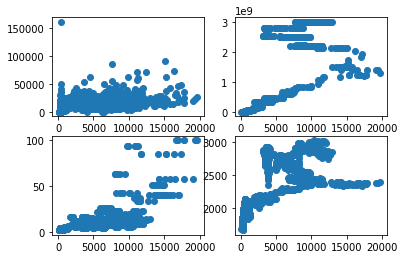

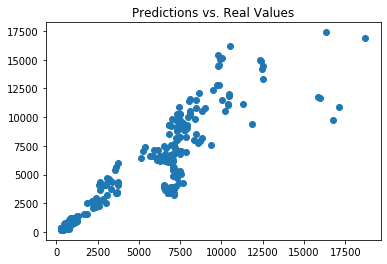

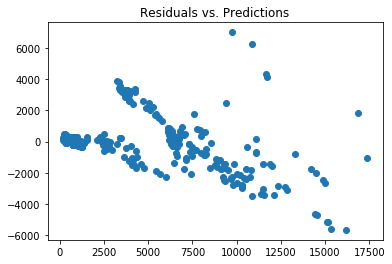

In [68]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.scatter(data['next_close'], data['vol_btc'])
ax2.scatter(data['next_close'], data['usdt_supply'])
ax3.scatter(data['next_close'], data['google_trends'])
ax4.scatter(data['next_close'], data['sp500'])
plt.show()

fig, axes = plt.subplots()
axes.scatter(pred_lin, y_test)
plt.title("Predictions vs. Real Values")
plt.show()

fig, axes = plt.subplots()
axes.scatter(y_test, pred_lin - y_test)
plt.title("Residuals vs. Predictions")
plt.show()


<br>

# 6) Push the limits

## Cool... so can we break this thing?

* We can try! Let's build a neural network
    * Multiple layers of nodes tweak each input slightly
    * Can model non-linear relationships
    * Resistant to wacky input data
    


In [72]:
from sklearn.neural_network import MLPRegressor

# Fit model
nn = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(3, 5))
nn.fit(x_train, y_train)

# Predict and score
pred_nn = nn.predict(x_test)
print(nn.coefs_)
print(metrics.r2_score(y_test, pred_nn))
print(metrics.mean_squared_error(y_test, pred_nn))

[array([[-0.80622367,  0.34763944,  0.19155755],
       [ 0.07119557, -0.16008636,  0.06305531],
       [ 0.32137905, -0.35479071,  0.24593453],
       [ 0.77202797,  0.6202321 ,  0.51040444]]), array([[ 0.47027324,  0.47118046, -0.76760257,  0.08263214, -0.69977071],
       [ 0.11473197,  0.04730881,  0.33885557,  0.46446447, -0.81423612],
       [ 0.1384503 ,  0.28375607, -0.1427834 , -0.75927603,  0.10917821]]), array([[-0.34680834],
       [ 0.85851568],
       [ 0.56986045],
       [-0.93175027],
       [-0.80776689]])]
0.6190508377976627
6290612.945236894
